# Проект по методу опорных векторов 



## Общее описание:

Компания-дистрибьютор вина недавно столкнулась с подделками. В итоге был проведён аудит различных вин с помощью химического анализа. Компания занимается экспортом очень качественных и дорогих вин, но один из поставщиков попытался передать дешёвое вино под видом более дорогого. Компания-дистрибьютор наняла Вас, чтобы Вы создали модель машинного обучения, которая предскажет низкое качество вина (то есть, "подделку"). Они хотят узнать, возможно ли определить разницу между дешёвыми и дорогими винами.


Источник данных: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*


## Задача: 

Используя данные, разработать модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддельным.

## План

**1. Импорт необходимых библиотек и загрузка данных** 

**2. Изучение и обработка данных**
   
**3. Построение регрессионной модели и оценка ее работы**



<hr style="border:1px solid">

## 1) Импорт необходимых библиотек и загрузка данных



In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [104]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


<hr>

## 2) Изучение и обработка данных

In [105]:
# смотрим на баланс классов

df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

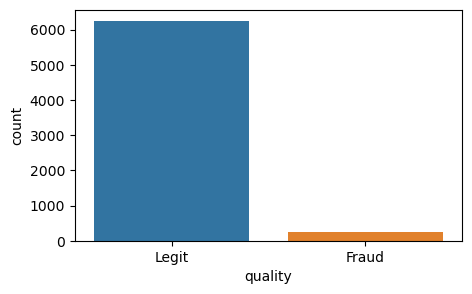

In [106]:
plt.figure(figsize=(5,3))
sns.countplot(df, x='quality');

Выясним, есть ли разница в количестве подделок в зависимости от того, красное вино или белое

<Axes: xlabel='type', ylabel='count'>

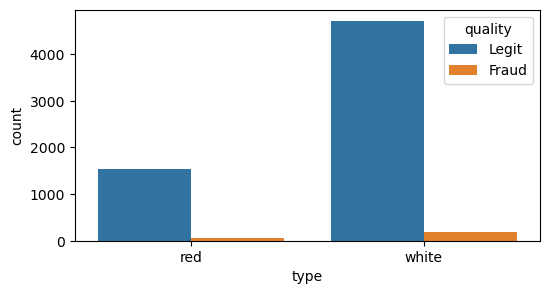

In [107]:

plt.figure(figsize=(6,3))
sns.countplot(df, x='type', hue='quality')

Выясним какой процент красных и белых вин является подделкой

In [108]:
df.groupby('type')['quality'].value_counts(normalize=True) * 100

type   quality
red    Legit      96.060038
       Fraud       3.939962
white  Legit      96.263781
       Fraud       3.736219
Name: proportion, dtype: float64

видим, что процент подделок примерно одинаков и среди красных вин, и среди белых

Посмотрим на корреляцию между различными признаками и колонкой "quality"

In [109]:
# сначала трансформируем значения столбца quality в dummy переменные

df['quality'] = df['quality'].apply(lambda x: 0 if x == 'Legit' else 1)

In [110]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red


In [111]:
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality']].corr()['quality']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality                 1.000000
Name: quality, dtype: float64

<hr>


## 3) Создание и оценка модели машинного обучения


In [112]:
# сконвертируем столбец type в dummy-переменные

df['type'] = df['type'].apply(lambda x: 0 if x == 'red' else 1)

In [113]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


Разделим данные на признаки X и целевую переменную y 

In [114]:
X = df.drop('quality', axis=1)
y = df['quality']

Разбиваем данные на обучающий и тестовый набор данных

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Масштабируем данные 

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
scaled_X_train = scaler.fit_transform(X_train)

In [120]:
scaled_X_test = scaler.transform(X_test)

Создаем экземпляр классификатора Support Vector Machine

In [121]:
from sklearn.svm import SVC

In [122]:
# поскольку классы не сбалансированы, устанавливаем значение параметра class_weight как balanced

SVM = SVC(class_weight='balanced')

С помощью GridSearchCV выполняем поиск по сетке значений параметров C и gamma

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
grid_param = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}

grid_model = GridSearchCV(SVM, grid_param)

In [129]:
grid_model.fit(scaled_X_train, y_train)

In [126]:
grid_model.best_params_

{'C': 1, 'gamma': 'auto'}

с помощью матрицы ошибок и отчета о метриках оценим эффективность модели

In [127]:
from sklearn.metrics import confusion_matrix, classification_report

In [130]:
y_pred = grid_model.predict(scaled_X_test)

In [131]:
confusion_matrix(y_test, y_pred)

array([[531,  92],
       [ 10,  17]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       623
           1       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**Вывод: Поскольку precision, accuracy и f1-score показали не очень хорошие результаты, модель не слишком хорошо способна находить поддельные вина. Возможно, модели не хватает дополнительных данных.**